In [43]:
from molmap import loadmap

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
#IPythonConsole.ipython_useSVG = True
import numpy as np


In [44]:
def get_color_dict(mp):
    df = mp._S.df
    return df.set_index('Subtypes')['colors'].to_dict()


def show_fmap(mp, X, figsize=(6,6), fname = './1.pdf'):
    
    mp_colors = get_color_dict(mp)
    fig =  plt.figure(figsize=figsize)
    channels = [i for i in mp.extract.colormaps.keys() if i in mp._S.channels ]
             
    
    for i, j  in enumerate(channels):

        data = X[:,:,mp._S.channels.index(j)]
        color = mp_colors[j]
        if mp.ftype == 'fingerprint':
            cmap = sns.dark_palette(color, n_colors =  2, reverse=True)
        else:
            cmap = sns.light_palette(color, n_colors =  100, reverse=False)
        
        ax = sns.heatmap(np.where(data !=0, data, np.nan), 
                    cmap = cmap, 
                    yticklabels=False, xticklabels=False, cbar=False, 
                    linewidths=0.005, linecolor = '0.9')# cbar_kws = dict(use_gridspec=False,location="top")

    ax.axhline(y=0, color='grey',lw=2, ls =  '--')
    ax.axvline(x=data.shape[1], color='grey',lw=2, ls =  '--')
    ax.axhline(y=data.shape[0], color='grey',lw=2, ls =  '--')
    ax.axvline(x=0, color='grey',lw=2, ls =  '--')

    patches = [ plt.plot([],[], marker="s", ms=8, ls="", mec=None, color=j, 
                label=i)[0]  for i,j in mp.extract.colormaps.items() if i in channels]
    
    l = 1.32
    if mp.ftype == 'fingerprint':
        l += 0.05
    plt.legend(handles=patches, bbox_to_anchor=(l,1.01), 
               loc='upper right', ncol=1, facecolor="w", numpoints=1 )    
    
    #plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight', dpi = 400)

In [36]:
df = pd.read_csv('./data.txt',sep='\t', index_col='ids')

In [54]:
df = df.iloc[1:]

In [55]:
mp1 = loadmap('../paper/descriptor.mp')
mp2 = loadmap('../paper/fingerprint.mp')

In [56]:
smiles_list = df.smiles.tolist()

In [57]:
X1 = mp1.batch_transform(smiles_list)
X2 = mp2.batch_transform(smiles_list)

100%|##########| 11/11 [00:00<00:00, 184.25it/s]


/home/shenwanxiang/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


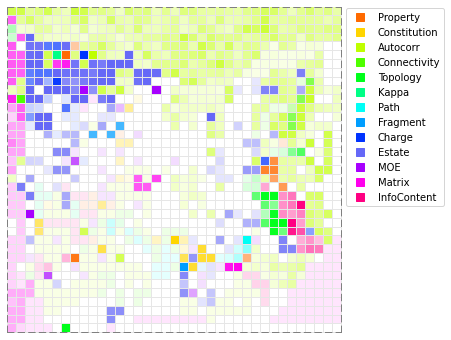

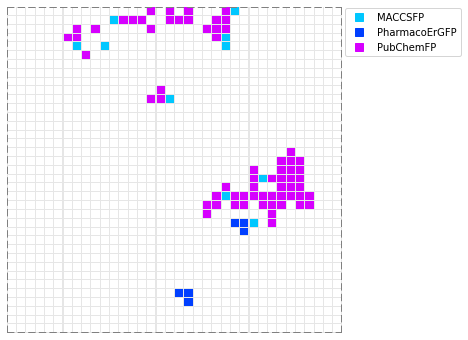

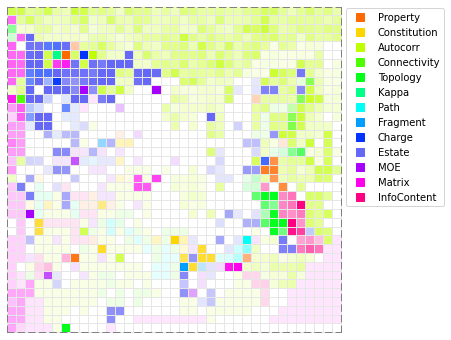

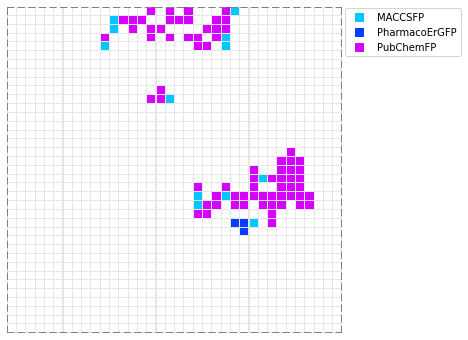

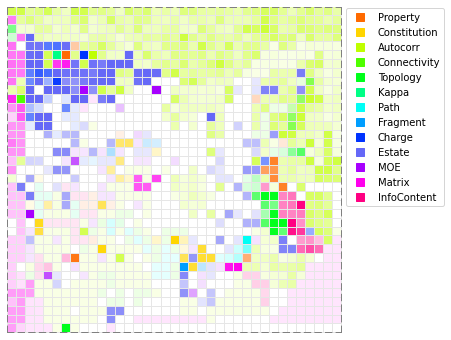

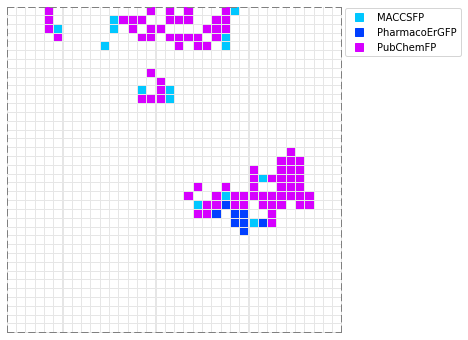

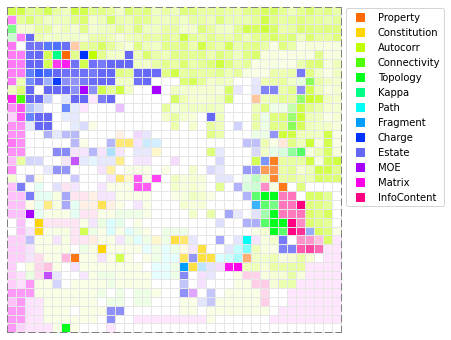

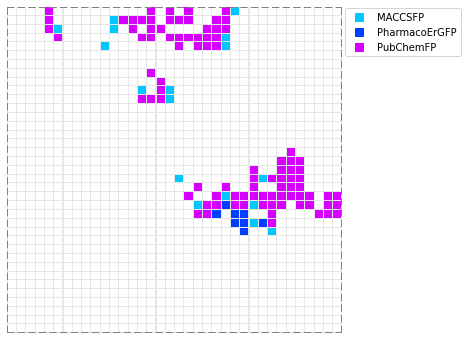

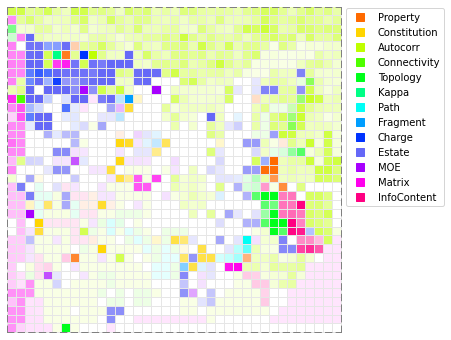

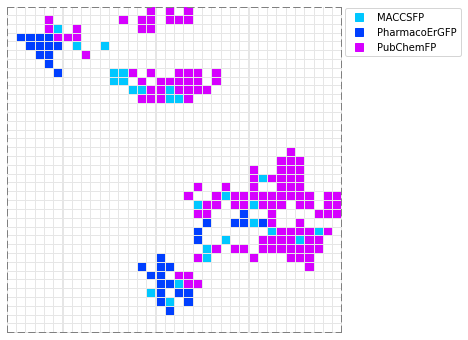

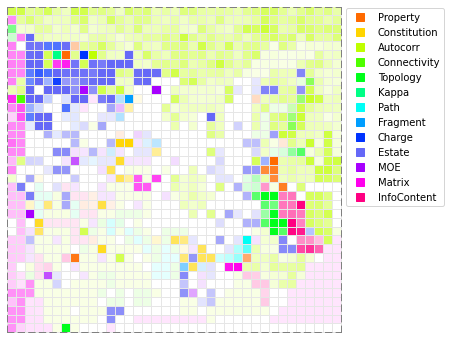

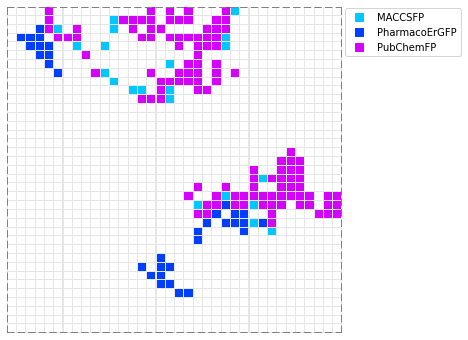

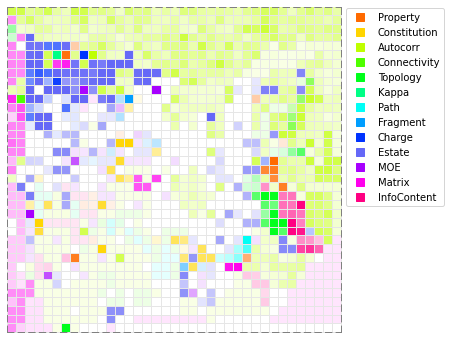

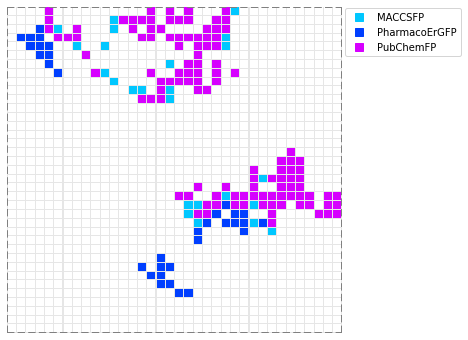

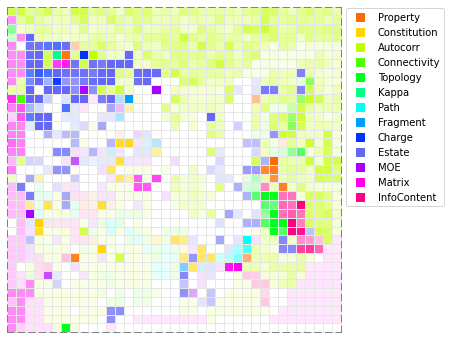

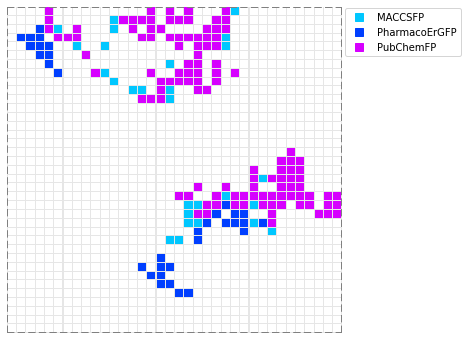

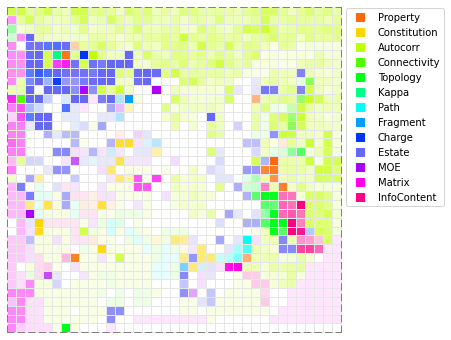

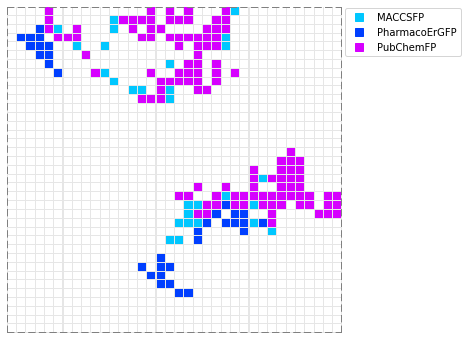

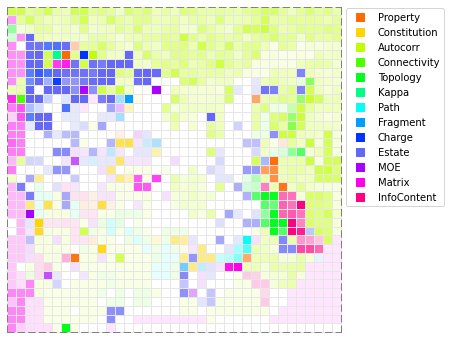

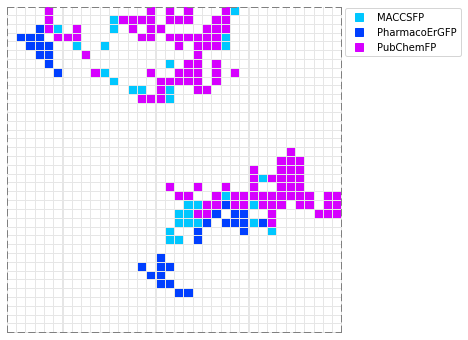

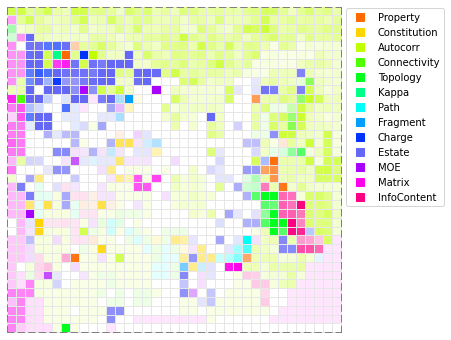

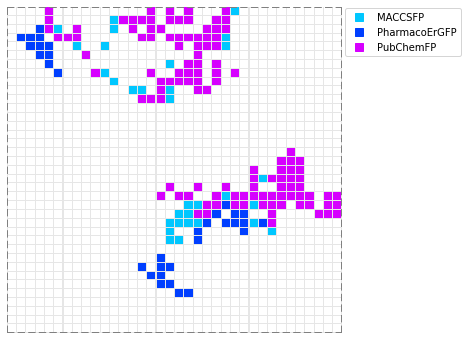

In [58]:
for x1, x2, name in zip(X1, X2, df.index.tolist()):
    show_fmap(mp1, x1, fname='./images/%s_x1.jpg' % name) 
    show_fmap(mp2, x2, fname='./images/%s_x2.jpg' % name) 
